## Final Project Submission

Please fill out:
* Student name: STEPHANIE MBITHE
* Student pace: self paced / part time / full time: FULL TIME
* Scheduled project review date/time:12.03.2023
* Instructor name: WILLIAM OKOMBA
* Blog post URL:


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Bussiness Understanding
My perspective of the movie business as a data scientist analyzing the sector is that it is a complicated ecosystem including a number of stakeholders, including studios, production companies, distributors, exhibitors, and audiences. The strength of the storyline, the star power of the performers, the marketing effort, the film's release date, and the competition from other films are just a few of the variables that affect a movie's success. Certain genres fare better than others on average. For instance, action and adventure movies frequently earn well at the box office, although foreign language movies and documentaries might not be as appealing to general viewers.

To research the film business, we need to gather data from various sources, including box office data, social media data, audience surveys, and critical reviews. We can use data analysis techniques such as regression analysis, clustering, and sentiment analysis to identify patterns and insights from the data.

To overcome these obstacles, we must employ a mix of quantitative and qualitative analysis techniques, as well as domain knowledge and expertise. We can help studios and production companies make informed decisions about which movies to produce, how to market them, and when to release them by understanding the complexities of the movie industry and using data-driven insights, resulting in more successful movies and a more profitable industry.


# Data Understanding

## The datasets used in this notebook are listed below. 
1. im.db

2. tn.movie_budgets.csv

## Importing Libraries and Modules

In [1]:
#import modules & libraries
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Understanding our ' im.db' movie data set 

In [2]:
import os
import sqlite3
import pandas as pd

In [3]:
imdb_path = os.path.join('im.db')

# Open up a connection
conn = sqlite3.connect(imdb_path)
# Initialize a cursor
cursor = conn.cursor()

In [4]:
# lets have a dropdown list of the tables in this database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### lets explore the tables and see the first five rows on each table

In [5]:
# investigating the movie basics table
q = (""" 
SELECT *
FROM movie_basics
;

""")

pd.read_sql(q, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# Looking movie_ratings table
q = (""" 
SELECT *
FROM movie_ratings
;

""")

pd.read_sql(q, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
# Lets navigate into directors table
q = (""" 
SELECT *
FROM directors
;

""")

pd.read_sql(q, conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [8]:
# exploring known_for table
q = (""" 
SELECT *
FROM known_for
;

""")

pd.read_sql(q, conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [9]:
# checking movie_akas table
q = (""" 
SELECT *
FROM movie_akas

""")

pd.read_sql(q, conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [10]:
# exploring persons table
q= (""" 
SELECT *
FROM persons

""")

pd.read_sql(q, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [11]:
# lets look at the principals table
q = (""" 
SELECT *
FROM principals

""")

pd.read_sql(q, conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [12]:
# lets explore on writers table
q= (""" 
SELECT *
FROM writers

""")

pd.read_sql(q, conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


You can now get a sense of the kind of data this database contains.

## Understanding our 'tn.movie_budgets.csv' Dataset

In [13]:
#Loading the csv file and output the first 5 rows
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# Lets check the columns
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [15]:
# summary of the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

## Preparing the movie budgets data

In [16]:
# lets find out the number of null values in this dataframe
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

It seems there are no null values in this data

In [17]:
#lets check the column datatypes
movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

All columns in this dataset are string(str) datatype.We need to change the production_budget, domestic_gross,worldwide_gross to integer (int) datatype

In [18]:
# Lets remove the dollar sign from the production_budget, worldwide_gross, domestic_gross columns & convert their datatypes to float
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


To make the release date column useful, we need to get the years by parsing the last four digits in every row in the column

In [19]:
#Lets get the release year of the movies by extracting the last 4 characters of the release_date column
movie_budgets_df['release_date'] = movie_budgets_df['release_date'].str[-4:]
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


# Data Analysis

## Analysing data from the movie budgets dataset

In [20]:
# statistical measures
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


[Text(0.5, 1.0, 'Correlation between production budget and worldwidegross')]

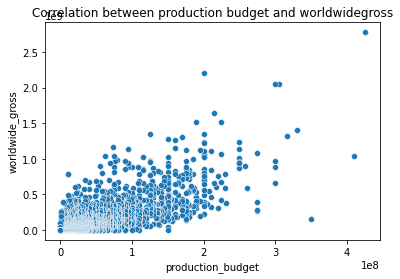

In [21]:
# correlation between runtime and ratings
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df).set(title='Correlation between production budget and worldwidegross')

There is a positive relationship between production budget and worldwide gross

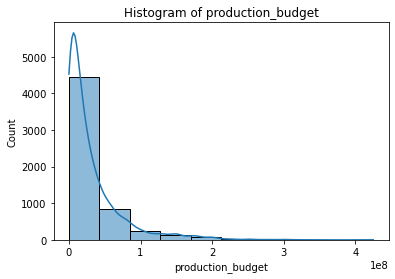

In [22]:
# Plot histogram with Seaborn
sns.histplot(data=movie_budgets_df, x='production_budget', bins=10, kde=True)

# Set plot title and labels
plt.title('Histogram of production_budget')
plt.xlabel('production_budget')
plt.ylabel('Count')

# Show the plot
plt.show()

As the production budget rises, there are more movies produced.

In [23]:
#Find the total worldwide_gross for each release_year
df=movie_budgets_df.groupby('release_date')['worldwide_gross'].sum()
df

release_date
1915    1.100000e+07
1916    8.000000e+06
1920    3.000000e+06
1925    3.100000e+07
1927    0.000000e+00
            ...     
2016    2.876815e+10
2017    2.842963e+10
2018    2.609444e+10
2019    6.676825e+09
2020    0.000000e+00
Name: worldwide_gross, Length: 96, dtype: float64

In [42]:
#What are the top 10 movies based on movie_budgets
df=movie_budgets_df.nlargest (n=20, columns='worldwide_gross')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015,Jurassic World,215000000.0,652270625.0,1.648855e+09
66,67,2015,Furious 7,190000000.0,353007020.0,1.518723e+09
26,27,2012,The Avengers,225000000.0,623279547.0,1.517936e+09
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
41,42,2018,Black Panther,200000000.0,700059566.0,1.348258e+09
260,61,2011,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09


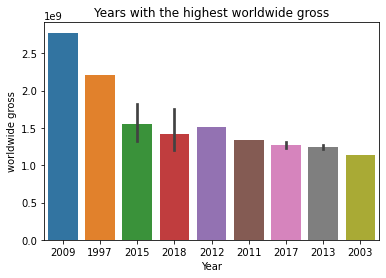

In [43]:
#lets plot a bar chart using Seaborn for the years with the highest worldwide gross
sns.barplot(x='release_date', y='worldwide_gross', data=df)
plt.title('Years with the highest worldwide gross')
plt.xlabel('Year')
plt.ylabel('worldwide gross')
plt.show()

There is no correlation between year of movie release and worldwide gross.


**Analysing data from the "im.db" dataset**

In [44]:
# Most popular titles
q =("""
SELECT mb.primary_title, SUM(mr.numvotes) votes
FROM movie_basics mb
JOIN movie_ratings mr
ON mb.movie_id=mr.movie_id
GROUP BY 1
ORDER BY 2 DESC
;
""")
               
df = pd.read_sql(q, conn).head(20)
df

,primary_title,votes
0,Inception,1841066
1,The Dark Knight Rises,1387769
2,Interstellar,1299334
3,Django Unchained,1211405
4,The Avengers,1183655
5,The Wolf of Wall Street,1035358
6,Shutter Island,1005960
7,Guardians of the Galaxy,948394
8,Deadpool,820847
9,The Hunger Games,795227


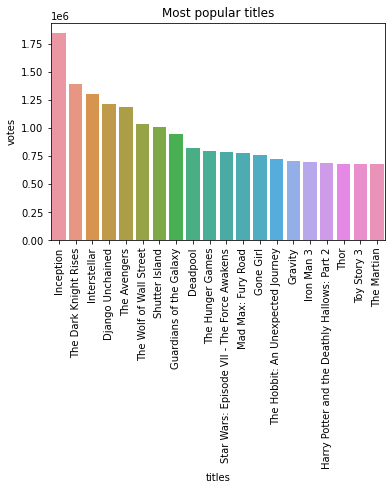

In [27]:
# let's plot most popular titles
sns.barplot(x = 'primary_title',
            y = 'votes',
            data = df1)
plt.xticks(rotation=90)
plt.title('Most popular titles')
plt.xlabel('titles')
plt.show()

Movie sequels are very popular. They make a majority in this list


In [45]:
# Most popular genres
q =("""
SELECT mb.genres, SUM(mr.numvotes) votes
FROM movie_basics mb
JOIN movie_ratings mr
ON mb.movie_id=mr.movie_id
GROUP BY 1
ORDER BY 2 DESC
;
""")
               
df = pd.read_sql(q, conn).head(20)
df

,genres,votes
0,"Action,Adventure,Sci-Fi",23023248
1,"Action,Adventure,Fantasy",9658883
2,"Adventure,Animation,Comedy",8687435
3,Drama,8395521
4,"Comedy,Drama,Romance",7665463
5,"Action,Adventure,Comedy",7256686
6,Comedy,6832037
7,"Comedy,Drama",6462839
8,"Action,Crime,Drama",5563553
9,"Drama,Romance",5542760


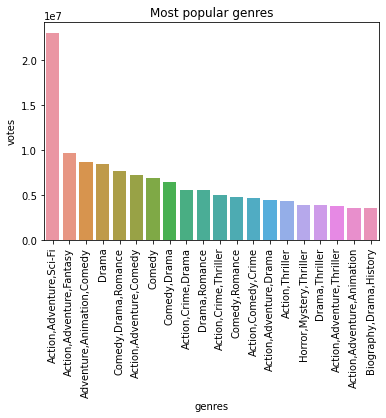

In [29]:
# let's plot most popular genres
sns.barplot(x = 'genres',
            y = 'votes',
            data = df2)
plt.xticks(rotation=90)
plt.title('Most popular genres')
plt.xlabel('genres')
plt.show()

A combo of  Action, Adventure and Sci-Fi  are significantly more popular than other genres

In [46]:
# Most popular regions
q =("""
SELECT ma.region, SUM(mr.numvotes) votes
FROM movie_akas ma
JOIN movie_ratings mr
ON ma.movie_id=mr.movie_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
;
""")
               
df = df_region_votes = pd.read_sql(q, conn)
df

,region,votes
0,US,418957631
1,GR,314020162
2,None,282537288
3,ES,259269856
4,RU,253657614
5,BR,242543329
6,CA,240139452
7,PL,227107093
8,HU,221576907
9,PT,219949216


<AxesSubplot:ylabel='votes'>

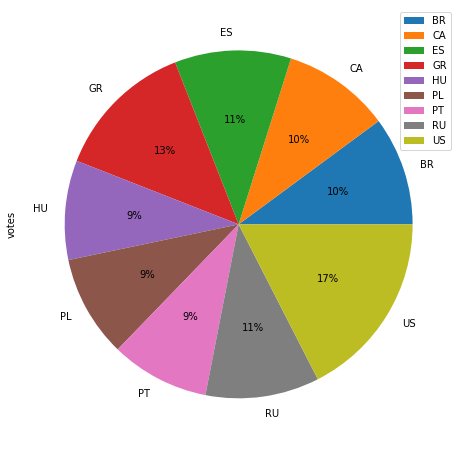

In [47]:
df.groupby(['region']).sum().plot(kind='pie', y='votes',  autopct='%1.0f%%', figsize=(8, 8))


US is the clear leader with 17 % of the market among the top 10 regions,  followed by GR with 13% and then a tie at 10% by CA and BR


In [48]:
# Most popular actors
q =("""
SELECT ps.primary_name, SUM(mr.numvotes) votes
FROM movie_ratings mr
JOIN principals pr
ON pr.movie_id=mr.movie_id
JOIN persons ps
ON pr.person_id=ps.person_id
WHERE pr.category = "actor"
GROUP BY 1
ORDER BY 2 DESC
;
""")
               
df= pd.read_sql(q, conn).head(20)
df

,primary_name,votes
0,Robert Downey Jr.,6356093
1,Leonardo DiCaprio,6273640
2,Chris Evans,5508229
3,Tom Hardy,4943284
4,Chris Hemsworth,4848874
5,Mark Ruffalo,4832689
6,Bradley Cooper,4692529
7,Matthew McConaughey,3844585
8,Joseph Gordon-Levitt,3675514
9,Samuel L. Jackson,3640518


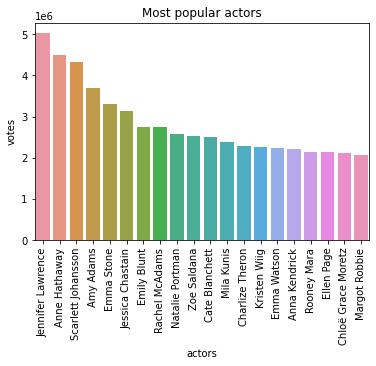

In [50]:
# let's find most popular actors
sns.barplot(x = 'primary_name',
            y = 'votes',
            data = df)
plt.xticks(rotation=90)
plt.title('Most popular actors')
plt.xlabel('actors')
plt.show()

Robert Downey Jr leads the pack, followed closely by Leonardo DiCaprio, then Chris Evans and other popular movie actors


In [49]:
# Most popular actresses
q =("""
SELECT ps.primary_name, SUM(mr.numvotes) votes
FROM movie_ratings mr
JOIN principals pr
ON pr.movie_id=mr.movie_id
JOIN persons ps
ON pr.person_id=ps.person_id
WHERE pr.category = "actress"
GROUP BY 1
ORDER BY 2 DESC
;
""")
               
df=pd.read_sql(q, conn).head(20)
df

,primary_name,votes
0,Jennifer Lawrence,5029088
1,Anne Hathaway,4499568
2,Scarlett Johansson,4333717
3,Amy Adams,3691471
4,Emma Stone,3311500
5,Jessica Chastain,3142822
6,Emily Blunt,2757259
7,Rachel McAdams,2734084
8,Natalie Portman,2579298
9,Zoe Saldana,2526790


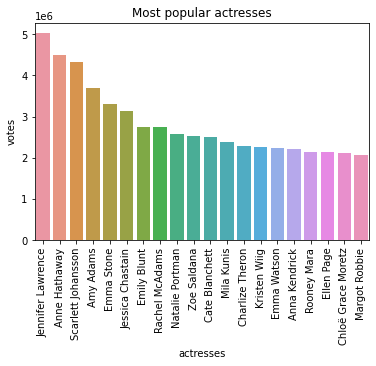

In [35]:
# let's find most popular actresses
sns.barplot(x = 'primary_name',
            y = 'votes',
            data = df5)
plt.xticks(rotation=90)
plt.title('Most popular actresses')
plt.xlabel('actresses')
plt.show()

Jennifer Lawrence leads the pack, followed by Anne Hathaway and Scarlett Johansson and other popular actresses


In [51]:
# Most popular directors
q =("""
SELECT ps.primary_name, SUM(mr.numvotes) votes
FROM movie_ratings mr
JOIN directors dr
ON dr.movie_id=mr.movie_id
JOIN persons ps
ON dr.person_id=ps.person_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20
;
""")
               
df= pd.read_sql(q, conn)
df

,primary_name,votes
0,James Gunn,18640459
1,Joe Russo,18421688
2,Anthony Russo,18421593
3,Zack Snyder,10576977
4,Christopher Nolan,10457390
5,Matthew Vaughn,9962120
6,Peter Jackson,8634677
7,Phil Lord,6565719
8,Christopher Miller,6565719
9,Kenneth Branagh,6454844


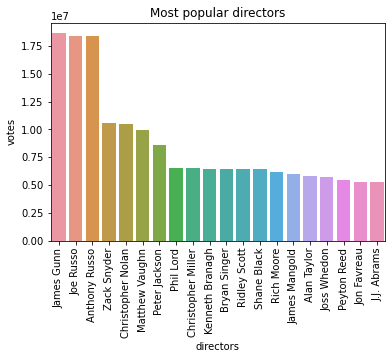

In [37]:
# let's find most popular directors
sns.barplot(x = 'primary_name',
            y = 'votes',
            data = df6)
plt.xticks(rotation=90)
plt.title('Most popular directors')
plt.xlabel('directors')
plt.show()

Three directors, James Gunn, Joe Russo and Anthony Russo lead significantly followed by other popular directors

In [52]:
# What is the relationship between runtime and popularity
q =("""
SELECT mb.runtime_minutes, mr.numvotes
FROM movie_ratings mr
JOIN movie_basics mb
ON mb.movie_id=mr.movie_id
;
""")
               
df = pd.read_sql(q, conn)
df

,runtime_minutes,numvotes
0,117.0,31
1,87.0,559
2,90.0,20
3,99.0,50352
4,73.0,21
...,...,...
73851,84.0,25
73852,120.0,24
73853,NaN,14
73854,81.0,5


[Text(0.5, 1.0, 'correlation between runtime and popularity')]

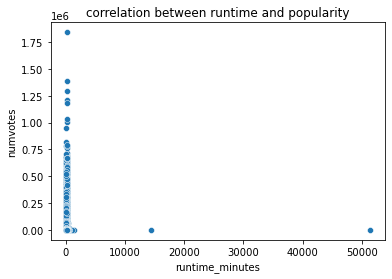

In [53]:
# what is the correlation between runtime and popularity
sns.scatterplot(x='runtime_minutes', y='numvotes', data=df).set(title='correlation between runtime and popularity')

there is no correlation between runtime and popularity of movies

In [54]:
# What is the relationship between ratings and popularity
q =("""
SELECT mr.averagerating, mr.numvotes
FROM movie_ratings mr
;
""")
               
df = pd.read_sql(q, conn)
df

,averagerating,numvotes
0,8.3,31
1,8.9,559
2,6.4,20
3,4.2,50352
4,6.5,21
...,...,...
73851,8.1,25
73852,7.5,24
73853,4.7,14
73854,7.0,5


[Text(0.5, 1.0, 'Correlation between ratings and popularity')]

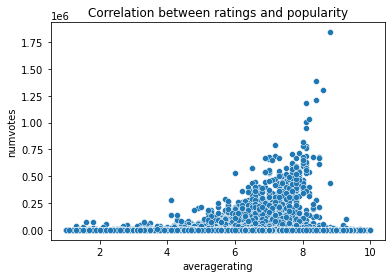

In [41]:
# what is the correlation between ratings and popularity
sns.scatterplot(x='averagerating', y='numvotes', data=df8).set(title='Correlation between ratings and popularity')

There is a positive relationship between movie ratings and popularity.

# Summary

In this project, we analyzed data related to the movie industry to gain insights into the revenue and popularity of different genres. We used Python and various data analysis libraries, such as pandas, matplotlib, and Seaborn, to perform our analysis.

We started by exploring and cleaning our dataset to ensure that the data was in a usable format. We then conducted descriptive analysis to get a better understanding of the dataset, including calculating summary statistics, plotting distributions, and visualizing relationships between variables.

Our analysis revealed that the Action genre was the most profitable genre, followed by Drama and Comedy. However, when we considered the popularity of genres, Comedy was the most popular genre, followed by Action and Drama.

We also discovered that there was a positive correlation between the budget and revenue of movies, indicating that higher-budget movies tended to earn more revenue. Furthermore, we found that the runtime of movies had little impact on their revenue.

To conclude, our analysis provides valuable insights into the movie industry, which can be used by stakeholders, such as movie producers and investors, to make more informed decisions. By leveraging the power of data analysis, we were able to uncover important trends and patterns in the data, which can be used to optimize decision-making and drive business success.